# Sales' Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 288 kB 4.2 MB/s eta 0:00:01


In [3]:
import seaborn as sns; sns.set_style("dark")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Loading data

In [5]:
%cd ..

/workspace/asurion_f22_muby


In [6]:
total_encoded_tabular = pd.read_csv("fe_data_v2/sale_data/train_sale_encoded.csv")

In [7]:
df_encoded = total_encoded_tabular

### EDA 

In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953112 entries, 0 to 953111
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          953112 non-null  object 
 1   quality_sale                953112 non-null  int64  
 2   accepted_flg                953112 non-null  int64  
 3   clndr_dt_cst                953112 non-null  object 
 4   start_dt                    953112 non-null  object 
 5   lines                       953112 non-null  int64  
 6   previous_tech_support_call  953112 non-null  int64  
 7   account_tenure              953112 non-null  int64  
 8   past_yr_claim_count         953112 non-null  int64  
 9   num_decline                 953112 non-null  int64  
 10  exp                         953112 non-null  int64  
 11  product_type                953112 non-null  object 
 12  pmake                       953112 non-null  object 
 13  claritas_hh_co

### Demographic Analysis

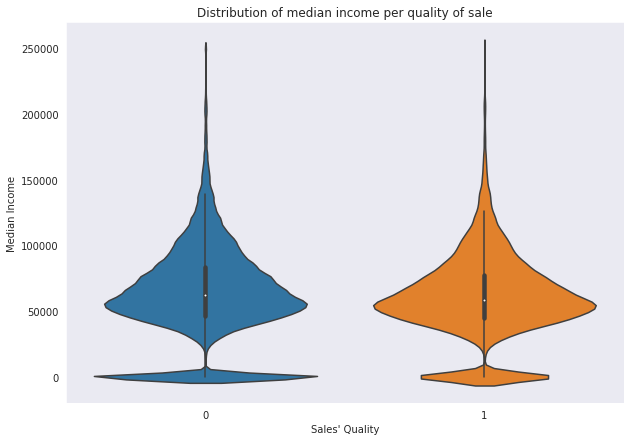

In [9]:
plt.figure(figsize = (10,7))
sns.violinplot(x = "quality_sale", y = "median_income", data = df_encoded)
plt.title("Distribution of median income per quality of sale")
plt.xlabel("Sales' Quality")
plt.ylabel("Median Income")
plt.show();

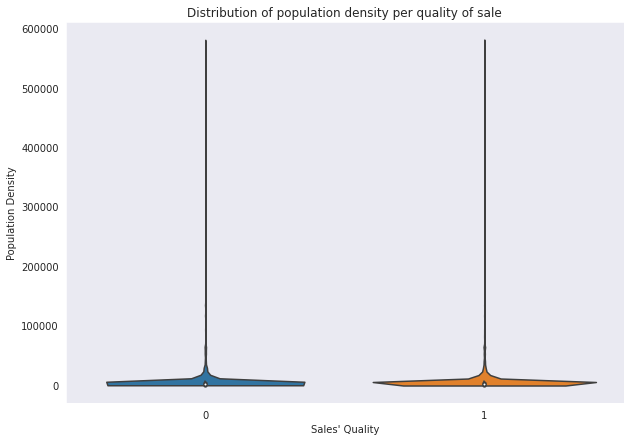

In [10]:
plt.figure(figsize = (10,7))
sns.violinplot(x = "quality_sale", y = "population_density", data = df_encoded)
plt.title("Distribution of population density per quality of sale")
plt.xlabel("Sales' Quality")
plt.ylabel("Population Density")
plt.show();

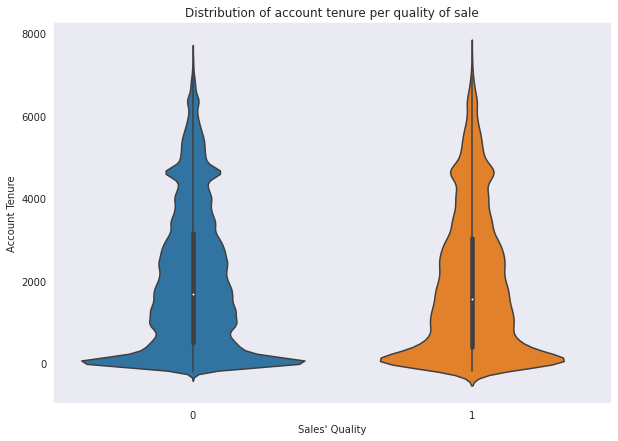

In [11]:
plt.figure(figsize = (10,7))
sns.violinplot(x = "quality_sale", y = "account_tenure", data = df_encoded)
plt.title("Distribution of account tenure per quality of sale")
plt.xlabel("Sales' Quality")
plt.ylabel("Account Tenure")
plt.show();

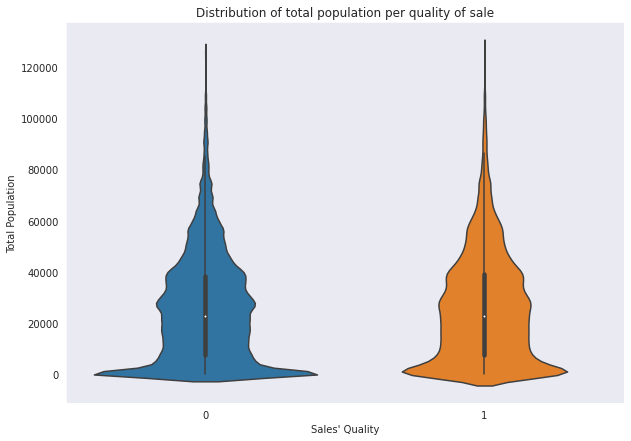

In [12]:
plt.figure(figsize = (10,7))
sns.violinplot(x = "quality_sale", y = "total_population", data = df_encoded)
plt.title("Distribution of total population per quality of sale")
plt.xlabel("Sales' Quality")
plt.ylabel("Total Population")
plt.show();

### Temporal Analysis

#### Hourly Analysis

In [13]:
hour_df = df_encoded.groupby(["time_of_day","quality_sale"], as_index = False).size()

In [14]:
hour_df = hour_df.pivot_table(index = "time_of_day", values = "size", columns = "quality_sale")
hour_df = hour_df.fillna(0)
hour_df["total_calls"] = hour_df[0] + hour_df[1]
hour_df["prop_accepted"] = hour_df.loc[:,1]/(hour_df.loc[:,0] + hour_df.loc[:,1])
hour_df["time_of_day"] = hour_df.index
hour_df = hour_df.reset_index(drop = True)
hour_df = hour_df.rename_axis(None, axis=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
mmscale = MinMaxScaler()

In [17]:
import numpy as np

In [18]:
hour_df["total_prop"] = mmscale.fit_transform(np.array(hour_df["total_calls"]).reshape(-1,1))

In [19]:
#plt.figure(figsize = (10,7))
#sns.lineplot(x = "time_of_day", y = "total_prop", data = hour_df, color = "blue")
#sns.lineplot(x = "time_of_day", y = "mean_sales", data = hour_df, color = "red")
#plt.xlabel("Hour of the day")
#plt.ylabel("value")
#plt.legend(["Total Sales", "Average Sales"])
#plt.show();

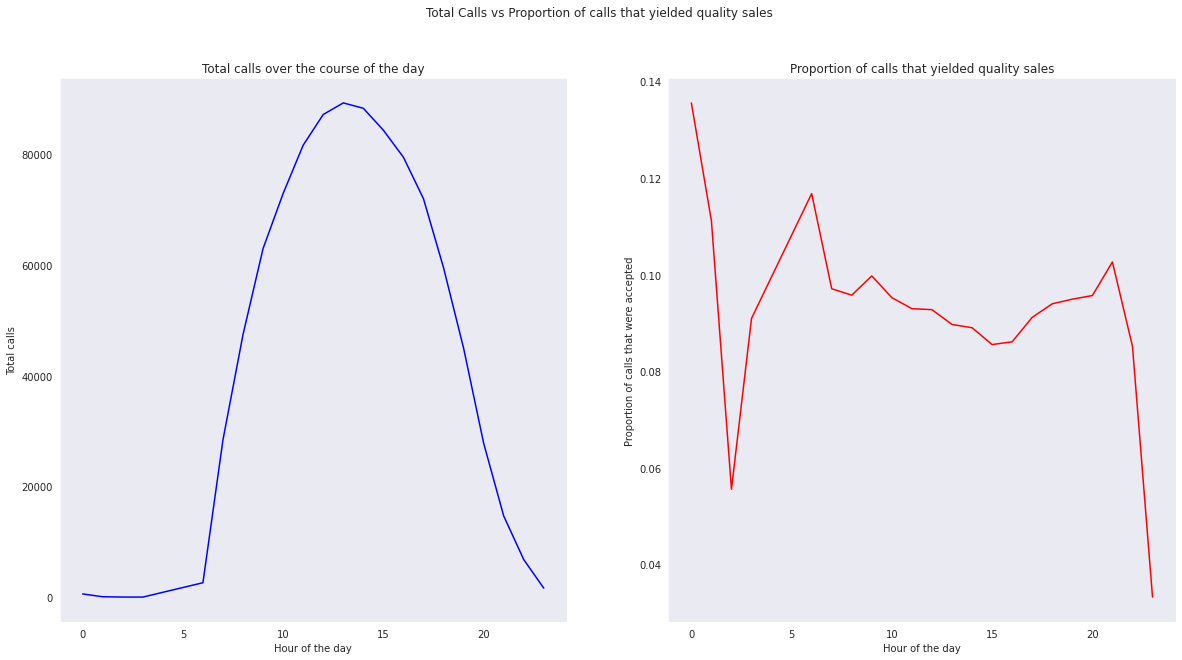

In [20]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(20,10))
fig.suptitle('Total Calls vs Proportion of calls that yielded quality sales')

sns.lineplot(ax = ax1, x = "time_of_day", y = "total_calls", data = hour_df, color = "blue");
ax1.set_ylabel('Total calls');
ax1.set_xlabel('Hour of the day');
ax1.set_title('Total calls over the course of the day');

sns.lineplot(ax = ax2, x = "time_of_day", y = "prop_accepted", data = hour_df, color = "red");
ax2.set_ylabel('Proportion of calls that were accepted');
ax2.set_xlabel('Hour of the day');
ax2.set_title('Proportion of calls that yielded quality sales');

In [21]:
fig.savefig("call.png")

### Day of the Week Analysis

In [22]:
day_df = df_encoded.groupby(["day_of_week","quality_sale"], as_index = False).size()

In [23]:
day_df = day_df.pivot_table(index = "day_of_week", values = "size", columns = "quality_sale")
day_df = day_df.fillna(0)
day_df["total_calls"] = day_df[0] + day_df[1]
day_df["prop_accepted"] = day_df.loc[:,1]/(day_df.loc[:,0] + day_df.loc[:,1])
day_df["day_of_week"] = day_df.index
day_df = day_df.reset_index(drop = True)
day_df = day_df.rename_axis(None, axis=1)

In [24]:
day_df = day_df.sort_values("prop_accepted", ascending = False)
day_df

,0,1,total_calls,prop_accepted,day_of_week
3,69698,8435,78133,0.107957,Sunday
2,96673,11226,107899,0.104042,Saturday
0,131748,13158,144906,0.090804,Friday
4,143995,14249,158244,0.090044,Thursday
6,146079,14294,160373,0.089130,Wednesday
1,131754,12623,144377,0.087431,Monday
5,145404,13776,159180,0.086544,Tuesday


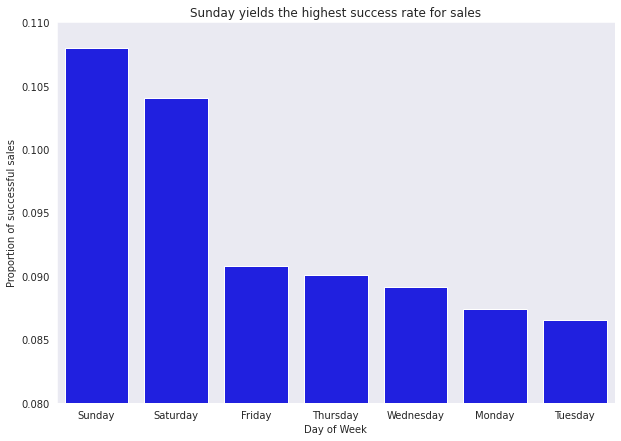

In [25]:
plt.figure(figsize = (10,7))
sns.barplot(x = "day_of_week", y = "prop_accepted", data = day_df, color = "blue")
plt.xlabel("Day of Week")
plt.ylabel("Proportion of successful sales")
plt.title("Sunday yields the highest success rate for sales")
plt.ylim(0.08, 0.11)
plt.show();

### Day of Week + Hour Analysis

In [26]:
period_df = df_encoded.groupby(["day_of_week","time_of_day","quality_sale"], as_index = False).size()

In [27]:
period_df = period_df.pivot_table(index = ["time_of_day","day_of_week"], values = "size", columns = "quality_sale",aggfunc="sum").reset_index()
period_df = period_df.fillna(0)
period_df["total_calls"] = period_df[0] + period_df[1]
period_df["prop_accepted"] = period_df.loc[:,1]/(period_df.loc[:,0] + period_df.loc[:,1])
#period_df["day_time"] = period_df.index
period_df = period_df.reset_index(drop = True)
period_df = period_df.rename_axis(None, axis=1)

In [28]:
period_df

,time_of_day,day_of_week,0,1,total_calls,prop_accepted
0,0,Friday,86.0,14.0,100.0,0.140000
1,0,Monday,12.0,0.0,12.0,0.000000
2,0,Saturday,78.0,12.0,90.0,0.133333
3,0,Sunday,13.0,1.0,14.0,0.071429
4,0,Thursday,119.0,21.0,140.0,0.150000
...,...,...,...,...,...,...
142,23,Saturday,154.0,7.0,161.0,0.043478
143,23,Sunday,117.0,1.0,118.0,0.008475
144,23,Thursday,297.0,9.0,306.0,0.029412
145,23,Tuesday,255.0,13.0,268.0,0.048507


In [29]:
period_df.sort_values(by = "prop_accepted", ascending = False).head(20)

,time_of_day,day_of_week,0,1,total_calls,prop_accepted
22,3,Wednesday,2.0,1.0,3.0,0.333333
16,2,Thursday,3.0,1.0,4.0,0.250000
9,1,Saturday,5.0,1.0,6.0,0.166667
7,1,Friday,5.0,1.0,6.0,0.166667
4,0,Thursday,119.0,21.0,140.0,0.150000
11,1,Thursday,23.0,4.0,27.0,0.148148
6,0,Wednesday,106.0,18.0,124.0,0.145161
10,1,Sunday,6.0,1.0,7.0,0.142857
0,0,Friday,86.0,14.0,100.0,0.140000
45,9,Sunday,4083.0,630.0,4713.0,0.133673


In [30]:
period_df[period_df["total_calls"] > 100].sort_values(by = "prop_accepted", ascending = False).head(20)

,time_of_day,day_of_week,0,1,total_calls,prop_accepted
4,0,Thursday,119.0,21.0,140.0,0.150000
6,0,Wednesday,106.0,18.0,124.0,0.145161
45,9,Sunday,4083.0,630.0,4713.0,0.133673
5,0,Tuesday,90.0,13.0,103.0,0.126214
27,6,Wednesday,506.0,73.0,579.0,0.126079
38,8,Sunday,3145.0,445.0,3590.0,0.123955
37,8,Saturday,5014.0,685.0,5699.0,0.120197
26,6,Tuesday,491.0,67.0,558.0,0.120072
24,6,Monday,383.0,52.0,435.0,0.119540
31,7,Sunday,1492.0,200.0,1692.0,0.118203


In [31]:
period_df[period_df["total_calls"] > 1000].sort_values(by = "prop_accepted", ascending = False).head(20)

,time_of_day,day_of_week,0,1,total_calls,prop_accepted
45,9,Sunday,4083.0,630.0,4713.0,0.133673
38,8,Sunday,3145.0,445.0,3590.0,0.123955
37,8,Saturday,5014.0,685.0,5699.0,0.120197
31,7,Sunday,1492.0,200.0,1692.0,0.118203
30,7,Saturday,2488.0,333.0,2821.0,0.118043
44,9,Saturday,6698.0,884.0,7582.0,0.116592
51,10,Saturday,8707.0,1120.0,9827.0,0.113972
66,12,Sunday,7217.0,924.0,8141.0,0.113500
52,10,Sunday,5609.0,713.0,6322.0,0.112781
73,13,Sunday,7136.0,894.0,8030.0,0.111333


### Claritas Household Count Analysis

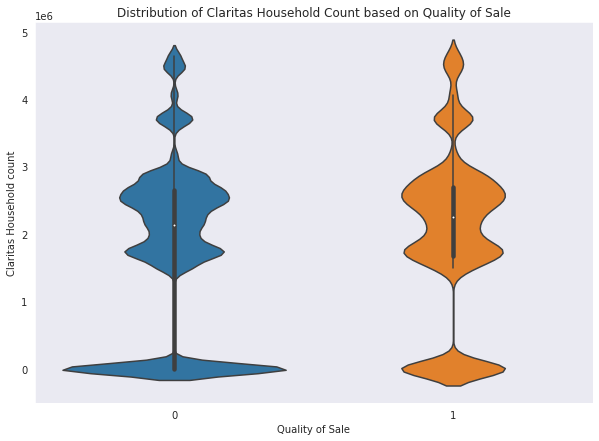

In [32]:
plt.figure(figsize = (10,7))
sns.violinplot(x = "quality_sale", y = "claritas_hh_count", data = df_encoded)
plt.xlabel("Quality of Sale")
plt.ylabel("Claritas Household count")
plt.title("Distribution of Claritas Household Count based on Quality of Sale")
plt.show();

### Expensive Product Analysis

In [33]:
exp_df = df_encoded.groupby(["quality_sale","exp"], as_index = False).size()

In [34]:
exp_df = exp_df.pivot_table(index = "exp", values = "size", columns = "quality_sale").reset_index()

In [35]:
exp_df["good_sales_prop"] = exp_df[1]/(exp_df[0] + exp_df[1])

In [36]:
exp_df = exp_df.reset_index(drop = True)
exp_df = exp_df.rename_axis(None, axis=1)
exp_df

,exp,0,1,good_sales_prop
0,0,397980,41023,0.093446
1,1,467371,46738,0.090911
